#### **Exercise 1**

Remove the outliers from the `sample_data_with_outliers.csv`!  Plot boxplots of the two features before and after outlier removal.  Try using different methods.  What works the best?

<Axes: >

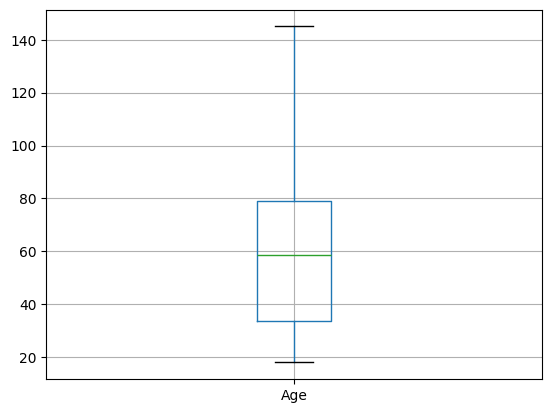

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

outlier_df = pd.read_csv('./sample_data_with_outliers.csv')

outlier_df.columns

outlier_df.boxplot('Age')

<Axes: >

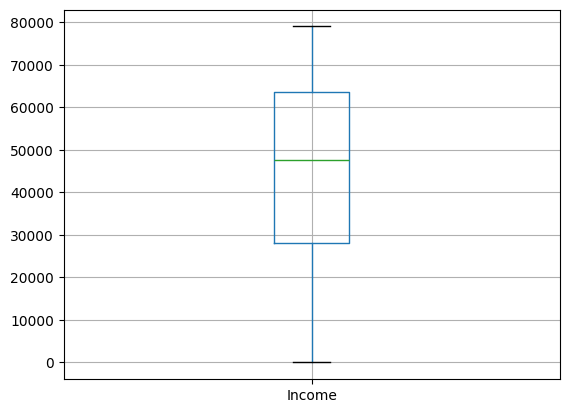

In [14]:
outlier_df.boxplot('Income')

<Axes: >

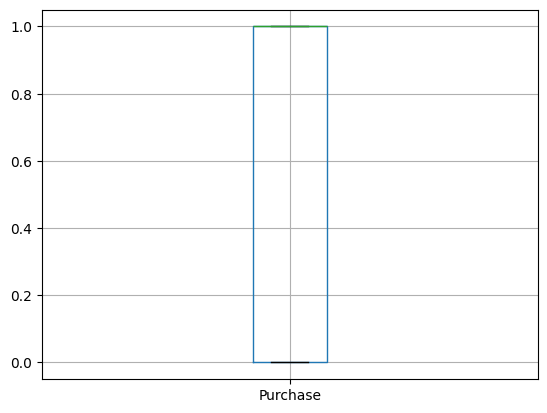

In [15]:
outlier_df.boxplot('Purchase')

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

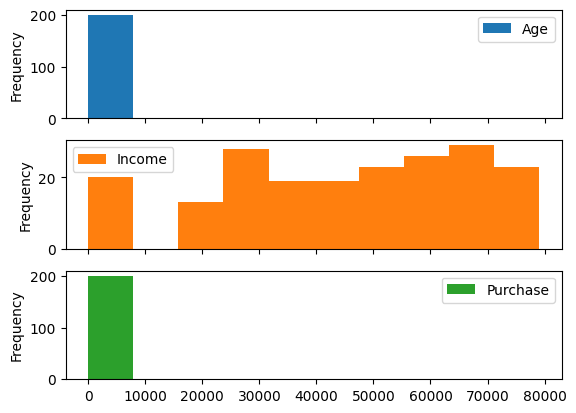

In [17]:
outlier_df.plot.hist(subplots=True)

Age


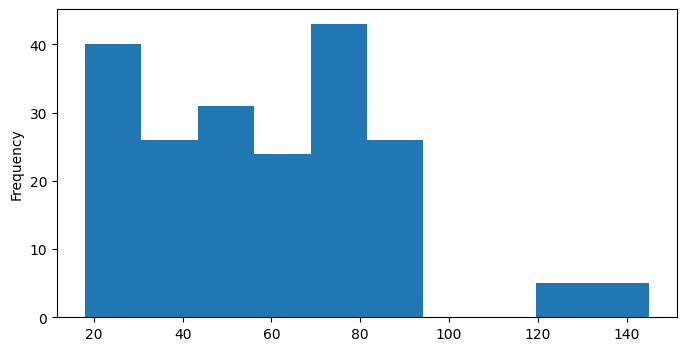

Income


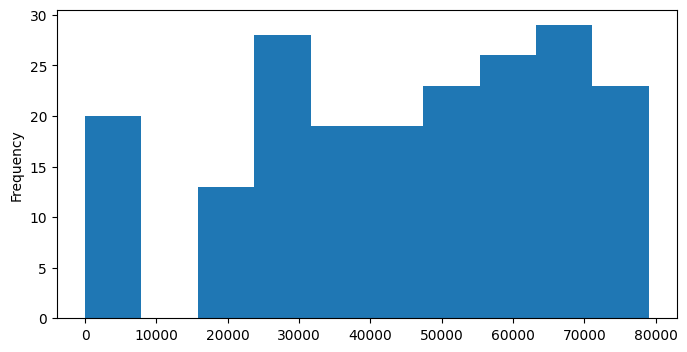

Purchase


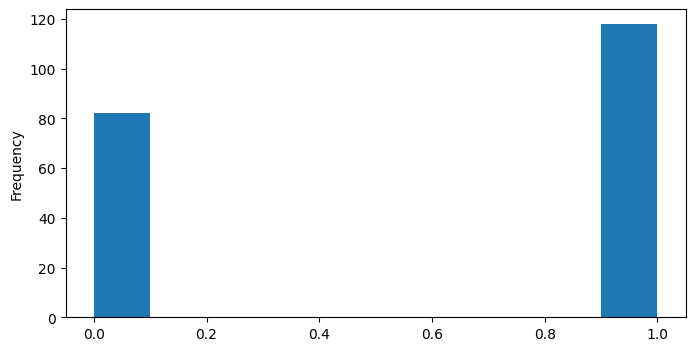

In [21]:
for c in outlier_df.columns:
    print(c)
    plt.figure(figsize=(8,4))
    outlier_df[c].plot.hist()
    plt.show()

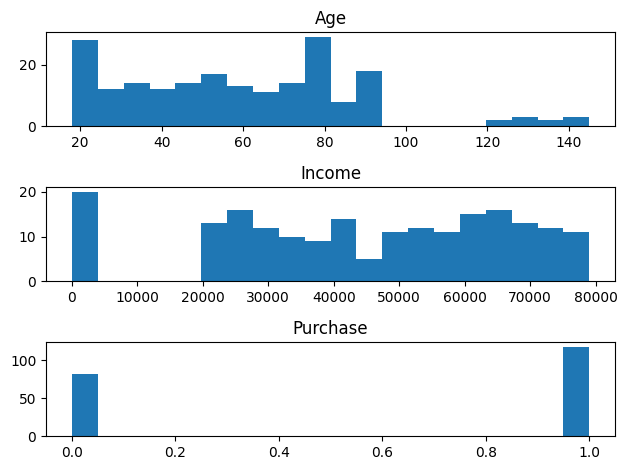

In [25]:
def plot_data(df):
    fig, axes = plt.subplots(3)
    for idx, column in enumerate(df):
        axes[idx].hist(df[column], bins=20,label=column)
        axes[idx].set_title(column)
    plt.tight_layout()
plot_data(outlier_df)

In [27]:
from scipy.stats import zscore
z_scores = outlier_df.apply(zscore)
z_scores

,Age,Income,Purchase
0,0.600017,1.349827,0.833616
1,1.020468,0.786128,-1.199593
2,0.810243,0.764277,0.833616
3,0.775205,0.983641,0.833616
4,0.109492,-0.634154,-1.199593
...,...,...,...
195,0.074455,0.713096,0.833616
196,0.179567,0.227593,0.833616
197,-0.451108,-0.890369,-1.199593
198,-1.046746,0.717547,0.833616


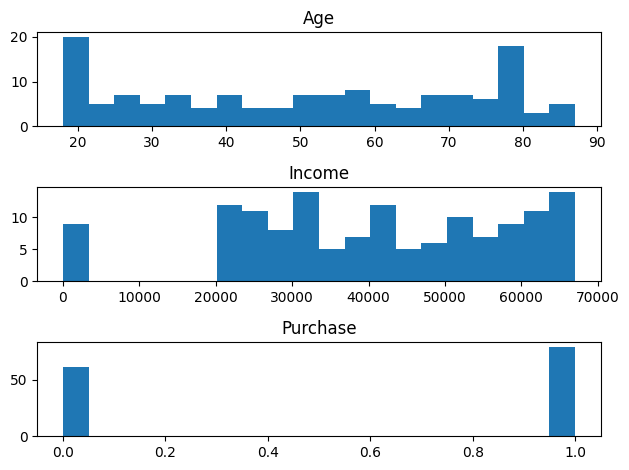

In [29]:
threshold = 1
df_zfiltered = outlier_df[(z_scores < threshold).all(axis=1)]
plot_data(df_zfiltered)

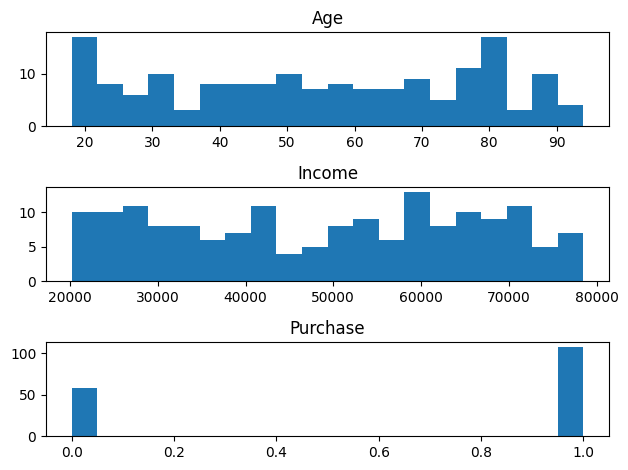

In [33]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.17, random_state=42)
outliers = iso_forest.fit_predict(outlier_df)

df_filtered = outlier_df[outliers == 1]

plot_data(df_filtered)

#### **Exercise 2**

In the following, I've created a sample dataset with an exponential feature and a normal feature. Try using the different scaling methods before running the classifier.  How do your results change:

1.  If you scale the exponential feature using a StandardScaler
2.  If you scale the exponential feature using a Log transform

Logistic Regression without Scaling - Test Accuracy: 0.72


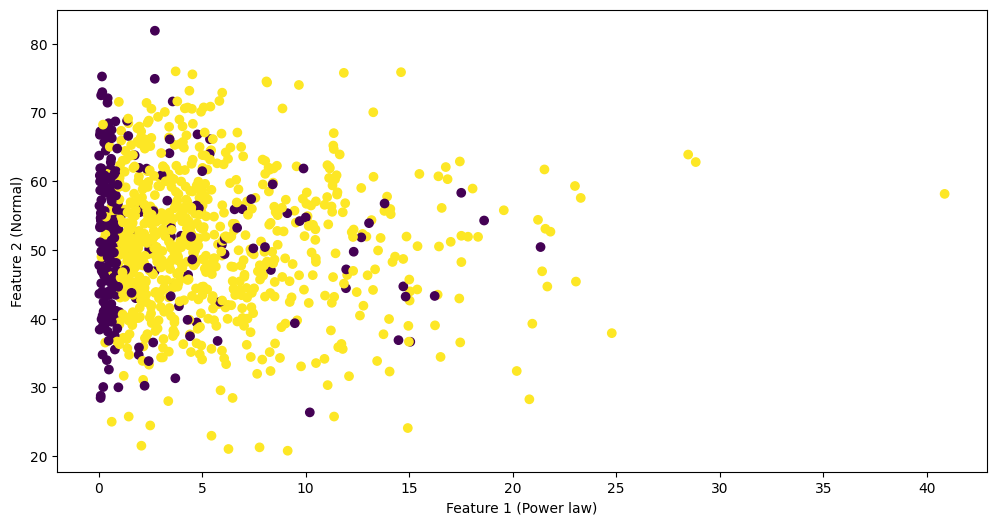

In [34]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]



# Combine features into single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(f"Logistic Regression without Scaling - Test Accuracy: {lr.score(X_test, y_test):.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.show()


#### **Exercise 3**

The **Titanic dataset** (link to the data from [last week](../2-week2//data/titanic.csv)) contains the passenger list for all 768 passengers on the Titanic, as well as who survived. In this exercise, try using different methods for dealing with the nulls in the "age" column, and running the same classifier for the different methods (you might try a DecisionTreeClassifier, or a LogisticRegression classifier, or a SGDClassifier).  Which one gives the best result?  Why do you think that is?  Please only use the following columns for modeling: pclass, sex, age, sibsp, parch.  Be sure to try the following methods:

1. Fill forward, using 'ffill' in Pandas
2. Use a "mean" with a SimpleImputer
3. Use a "most_frequent" with a simple imputer
4. Use a KNN imputer from sklearn

#### **Exercise 4**

Use the one-hot encoding method introduced in [](4-encoding.ipynb) for encoding multiple columns to one-hot encode the following data. 

In [ ]:
sample = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'blue', 'green'],
    'target': ['apple', 'sky', 'grass', 'sky', 'moon', 'apple'],
    'yumminess': [10,2,3,1,6,9]
})

# Your code here

#### **Exercise 5**

In along with this notebook, there is a data file called `synthetic_patient_unbalanced.csv` which simulates a dataset of patients who have been examined for cardiovascular disease (CVD).  The data contains the following columns:

#### Columns:
1. **gender** (Categorical): Gender of the patient. (Male, Female)
2. **age** (Numeric): Age of the patient.
3. **bmi** (Numeric): Body Mass Index of the patient.
4. **systolic_bp** (Numeric): Systolic blood pressure level of the patient.
5. **diastolic_bp** (Numeric): Diastolic blood pressure level of the patient.
6. **cholesterol_level** (Numeric): Cholesterol level of the patient. 
7. **exercise_frequency** (Categorical): How often the patient exercises.
8. **smoker** (Categorical): Whether the patient is a smoker or not. (0=No, 1=Yes).
9. **family_history** (Categorical): Whether the patient has a family history of the disease. (0=No, 1=Yes).
10. **diet_quality** (Categorical): Quality of the patient's diet. 
11. **us_state** (Categorical): The US State where the patient resides.
12. **has_disease** (Binary): Whether the patient has the disease or not. (0=No, 1=Yes).

#### Task:

1. After pre-processing the data, perform an end-to-end analysis.  
2. Evaluate precision, recall, f1-score, and accuracy using 5-fold cross-validation.

BONUS: See if you can figure out how to add SMOTE to the pipeline